# Import libraries

In [10]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# scikit
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Import libraries

In [3]:
X_mat_AQI = np.load('X_mat_AQI.npz', allow_pickle=True)

print(X_mat_AQI.files)

X_AQI = X_mat_AQI['X']


X_mat_only = np.load('X_mat_only.npz', allow_pickle=True)

print(X_mat_only.files)

X_only = X_mat_only['X']

['X']
['X']


In [6]:
# eclampsia data (labels)

Y_eclampsia = np.load('Yeclam.npz', allow_pickle=True)
print(Y_eclampsia.files)

Y_eclamp = Y_eclampsia['X']

['X']


# Split into train and test

In [7]:
Xtr_aqi, Xte_aqi, Ytr_aqi, Yte_aqi = train_test_split(X_AQI, Y_eclamp, test_size=0.2)

# change the shapes to have features as rows, samples as columns
Xtr_aqi = Xtr_aqi.T
Xte_aqi = Xte_aqi.T

print(f'Xtr {Xtr_aqi.shape}')
print(f'Ytr {Ytr_aqi.shape}')
print(f'Xte {Xte_aqi.shape}')
print(f'Yte {Yte_aqi.shape}')

Xtr (88, 2588039)
Ytr (2588039,)
Xte (88, 647010)
Yte (647010,)


In [8]:
np.savez_compressed('Xtr_aqi.npz', X=Xtr_aqi)
np.savez_compressed('Xte_aqi.npz', X=Xte_aqi)
np.savez_compressed('Ytr_aqi.npz', X=Ytr_aqi)
np.savez_compressed('Yte_aqi.npz', X=Yte_aqi)

# pca for AQI

In [12]:
# apply PCA to Xtr
pca_aqi = PCA()
Xtr_pca_aqi = pca_aqi.fit_transform(Xtr_aqi)

print("Shape of Xtrain_pca:", Xtr_pca_aqi.shape)

modes = pca_aqi.components_


Shape of Xtrain_pca: (88, 88)


In [13]:
#singular values - variances in each direction 
sing = pca_aqi.singular_values_

#find the full Frobenius norm (energy) - using all PCA modes
fullnorm = np.sum(sing**2)
print(fullnorm)

749991170678.2196


95.66607921022404
4


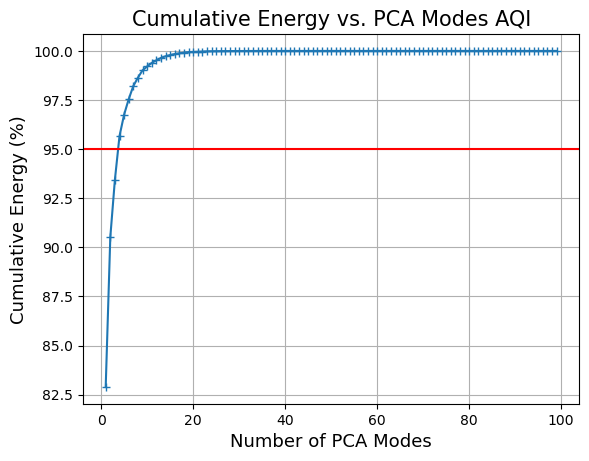

In [ ]:
# PCA for different numbers of PC modes

energies = []

for j in np.arange(1,100):
    s = sing[:j]
    #norm = np.sqrt(np.sum(s**2))
    norm = np.sum(s**2)
    energy = (norm/fullnorm) * 100
    energies.append(energy)

counter = 0
for i in energies:
    counter += 1
    if i >= 95:
        print(i)
        print(counter)
        break

# plot the cumulative energy as a function of number of PCA spatial modes
plt.plot(np.arange(1,100), energies, marker='+')
plt.xlabel('Number of PCA Modes', fontsize=13)
plt.ylabel('Cumulative Energy (%)', fontsize=13)
plt.title('Cumulative Energy vs. PCA w/ Modes AQI', fontsize=15)
plt.grid(True)

plt.axhline(y=95, color='r')

# repeat for maternal only dataset

# train test split

In [15]:
Xtr_only, Xte_only, Ytr_only, Yte_only = train_test_split(X_only, Y_eclamp, test_size=0.2)

# change the shapes to have features as rows, samples as columns
Xtr_only = Xtr_only.T
Xte_only = Xte_only.T

print(f'Xtr {Xtr_only.shape}')
print(f'Ytr {Ytr_only.shape}')
print(f'Xte {Xte_only.shape}')
print(f'Yte {Yte_only.shape}')

Xtr (73, 2588039)
Ytr (2588039,)
Xte (73, 647010)
Yte (647010,)


In [16]:
np.savez_compressed('Xtr_only.npz', X=Xtr_only)
np.savez_compressed('Xte_only.npz', X=Xte_only)
np.savez_compressed('Ytr_only.npz', X=Ytr_only)
np.savez_compressed('Yte_only.npz', X=Yte_only)

# pca for mat only

In [17]:
# apply PCA to Xtr
pca_only = PCA()
Xtr_pca_only = pca_only.fit_transform(Xtr_only)

print("Shape of Xtrain_pca:", Xtr_pca_only.shape)

modes = pca_only.components_


Shape of Xtrain_pca: (73, 73)


In [18]:
#singular values - variances in each direction 
sing = pca_only.singular_values_

#find the full Frobenius norm (energy) - using all PCA modes
fullnorm = np.sum(sing**2)
print(fullnorm)

66194356036.66773


96.3036611708458
5


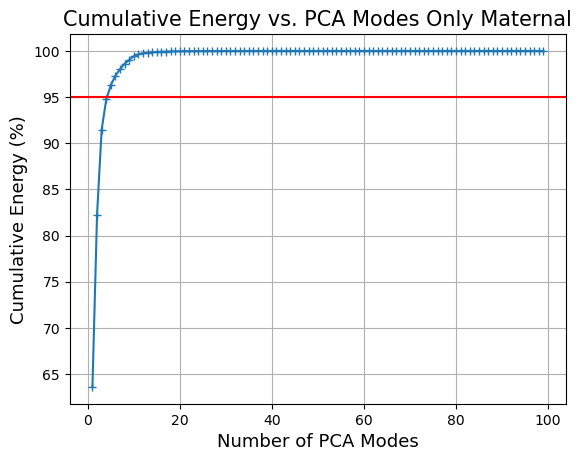

In [19]:
# PCA for different numbers of PC modes

energies = []

for j in np.arange(1,100):
    s = sing[:j]
    #norm = np.sqrt(np.sum(s**2))
    norm = np.sum(s**2)
    energy = (norm/fullnorm) * 100
    energies.append(energy)

counter = 0
for i in energies:
    counter += 1
    if i >= 95:
        print(i)
        print(counter)
        break

# plot the cumulative energy as a function of number of PCA spatial modes
plt.plot(np.arange(1,100), energies, marker='+')
plt.xlabel('Number of PCA Modes', fontsize=13)
plt.ylabel('Cumulative Energy (%)', fontsize=13)
plt.title('Cumulative Energy vs. PCA Modes Only Maternal', fontsize=15)
plt.grid(True)

plt.axhline(y=95, color='r')